# Brief
By following the steps Data analytics, cleaning the data and thereby building the model to predict, there has been progress in the Kaggle Titanic competetion.
Out of all the submission tries the best testing efficiency output i got is from the below model.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

train_path = "Test data/train.csv"
test_path = "Test data/test.csv"

b = pd.read_csv(train_path)
b_test = pd.read_csv(test_path)


b.drop("Survived", axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

In [3]:
b['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
embarked_grouped = b.groupby("Embarked").aggregate({"Survived": "sum"})
embarked_grouped.reset_index(inplace=True)

In [5]:
embarked_grouped.head()

,Embarked,Survived
0,C,93
1,Q,30
2,S,217


In [6]:
b.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
b['cabin_mapped'] = b['Cabin'].map(lambda x: str(x)[0])

In [8]:

cat_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'cabin_mapped']

for i in cat_columns:
    print(i)
    grouped = b.groupby(i).aggregate({"Survived": "sum"})
    grouped = pd.concat([grouped, b[i].value_counts()], axis=1)
    grouped.rename(columns={i: "Total"}, inplace=True)
    grouped['Percentage'] = grouped['Survived'] / grouped['Total']
    display(grouped)

Pclass


,Survived,Total,Percentage
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


Sex


,Survived,Total,Percentage
female,233,314,0.742038
male,109,577,0.188908


SibSp


,Survived,Total,Percentage
0,210,608,0.345395
1,112,209,0.535885
2,13,28,0.464286
3,4,16,0.250000
4,3,18,0.166667
5,0,5,0.000000
8,0,7,0.000000


Parch


,Survived,Total,Percentage
0,233,678,0.343658
1,65,118,0.550847
2,40,80,0.500000
3,3,5,0.600000
4,0,4,0.000000
5,1,5,0.200000
6,0,1,0.000000


Embarked


,Survived,Total,Percentage
C,93,168,0.553571
Q,30,77,0.389610
S,217,644,0.336957


cabin_mapped


,Survived,Total,Percentage
A,7,15,0.466667
B,35,47,0.744681
C,35,59,0.593220
D,25,33,0.757576
E,24,32,0.750000
F,8,13,0.615385
G,2,4,0.500000
T,0,1,0.000000
n,206,687,0.299854


In [9]:
b['ticket_mapped'] = b['Ticket'].map(lambda x: x.split(" ")[-1])
b.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_mapped,ticket_mapped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,373450


In [10]:
b = b[b['ticket_mapped'] != 'LINE']
b['ticket_mapped'] = b['ticket_mapped'].astype(int)

# Feature Engineering

<AxesSubplot:>

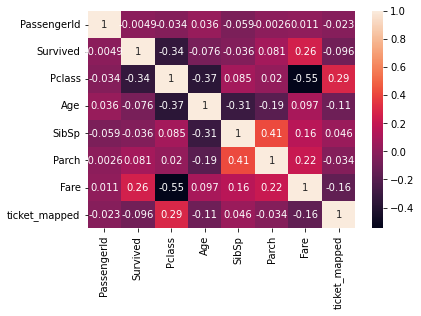

In [11]:
sns.heatmap(b.corr(), annot=True)

In [12]:
b['IsAlone'] = (b['SibSp'] + b['Parch']) == 0

In [13]:
b.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,ticket_mapped,IsAlone
PassengerId,1.000000,-0.004948,-0.033674,0.035636,-0.058525,-0.002551,0.011458,-0.022994,0.059156
Survived,-0.004948,1.000000,-0.338637,-0.075807,-0.036000,0.081241,0.257248,-0.096400,-0.203057
Pclass,-0.033674,-0.338637,1.000000,-0.371676,0.085026,0.020252,-0.548447,0.286279,0.132579
Age,0.035636,-0.075807,-0.371676,1.000000,-0.308528,-0.189100,0.097011,-0.107166,0.198193
SibSp,-0.058525,-0.036000,0.085026,-0.308528,1.000000,0.414244,0.158494,0.046018,-0.583898
Parch,-0.002551,0.081241,0.020252,-0.189100,0.414244,1.000000,0.215153,-0.033529,-0.582825
Fare,0.011458,0.257248,-0.548447,0.097011,0.158494,0.215153,1.000000,-0.156916,-0.270116
ticket_mapped,-0.022994,-0.096400,0.286279,-0.107166,0.046018,-0.033529,-0.156916,1.000000,0.038153
IsAlone,0.059156,-0.203057,0.132579,0.198193,-0.583898,-0.582825,-0.270116,0.038153,1.000000


In [14]:
b['Age*Pclass'] = b['Age'] * b['Pclass']
b.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,ticket_mapped,IsAlone,Age*Pclass
PassengerId,1.000000,-0.004948,-0.033674,0.035636,-0.058525,-0.002551,0.011458,-0.022994,0.059156,0.010808
Survived,-0.004948,1.000000,-0.338637,-0.075807,-0.036000,0.081241,0.257248,-0.096400,-0.203057,-0.338035
Pclass,-0.033674,-0.338637,1.000000,-0.371676,0.085026,0.020252,-0.548447,0.286279,0.132579,0.445911
Age,0.035636,-0.075807,-0.371676,1.000000,-0.308528,-0.189100,0.097011,-0.107166,0.198193,0.600854
SibSp,-0.058525,-0.036000,0.085026,-0.308528,1.000000,0.414244,0.158494,0.046018,-0.583898,-0.300244
Parch,-0.002551,0.081241,0.020252,-0.189100,0.414244,1.000000,0.215153,-0.033529,-0.582825,-0.144577
Fare,0.011458,0.257248,-0.548447,0.097011,0.158494,0.215153,1.000000,-0.156916,-0.270116,-0.328645
ticket_mapped,-0.022994,-0.096400,0.286279,-0.107166,0.046018,-0.033529,-0.156916,1.000000,0.038153,0.149490
IsAlone,0.059156,-0.203057,0.132579,0.198193,-0.583898,-0.582825,-0.270116,0.038153,1.000000,0.313088
Age*Pclass,0.010808,-0.338035,0.445911,0.600854,-0.300244,-0.144577,-0.328645,0.149490,0.313088,1.000000


# Building the Model

## Setup

In [15]:
b = pd.read_csv(train_path)
b_test = pd.read_csv(test_path)

In [16]:
b['train_test'] = 1
b_test['train_test'] = 0

In [17]:
all_data = pd.concat([b, b_test])

In [18]:
all_data['train_test'].value_counts()

1    891
0    418
Name: train_test, dtype: int64

In [19]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [20]:
all_data['cabin_mapped'] = all_data['Cabin'].map(lambda x: str(x)[0])
all_data['ticket_mapped'] = all_data['Ticket'].map(lambda x: x.split(" ")[-1])

all_data['Title'] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
all_data['IsAlone'] = (all_data['SibSp'] + all_data['Parch']) == 0
all_data['Age*Pclass'] = all_data['Age'] * all_data['Pclass']

## Null Values

In [21]:
all_data.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
train_test          0
cabin_mapped        0
ticket_mapped       0
Title               0
IsAlone             0
Age*Pclass        263
dtype: int64

In [22]:
all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)
all_data['Fare'].fillna(all_data['Fare'].mean(), inplace=True)
all_data['Age*Pclass'].fillna(all_data['Age*Pclass'].median(), inplace=True)

In [23]:
all_data.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
train_test          0
cabin_mapped        0
ticket_mapped       0
Title               0
IsAlone             0
Age*Pclass          0
dtype: int64

# Normalizing

In [24]:
all_data['norm_fare'] = np.log1p(all_data['Fare'])

# Transforming

In [25]:
# transform `Pclass` into a categorical
all_data['Pclass'] = all_data['Pclass'].astype(str)
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'norm_fare', 'train_test', 'Title', 'ticket_mapped', 'IsAlone', 'Age*Pclass', 'SibSp', 'Parch']])

# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['norm_fare', 'Age*Pclass', 'SibSp', 'Parch']] = scaler.fit_transform(all_dummies_scaled[['norm_fare', 'Age*Pclass', 'SibSp', 'Parch']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test == 1].Survived

# Training the data

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [28]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.8258427  0.80337079 0.80898876 0.87640449]
0.8282844768062269


In [29]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.8258427  0.86516854 0.78651685 0.80898876]
0.8215491808423827


In [30]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean())

[0.77653631 0.76966292 0.80898876 0.8258427  0.8258427 ]
0.8013746783001695


In [31]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.8258427  0.86516854 0.81460674 0.85955056]
0.835044881049526


In [32]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('dt', dt)], voting = 'soft') 
cv = cross_val_score(voting_clf, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.81460674 0.86516854 0.80898876 0.84269663]
0.8305379448873266


## Optimization

In [33]:
test = pd.read_csv(test_path)

In [34]:
from sklearn.model_selection import GridSearchCV 

In [35]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [36]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')
ideal_lr = LogisticRegression(**clf_lr.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8495825748540582
Best Parameters: {'C': 4.281332398719396, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8227292699767748
Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [38]:
voting_soft = VotingClassifier(estimators = [('lr', ideal_lr), ('knn', clf_knn.best_estimator_)])

In [39]:
params = {'weights' : [[1,1],[1,2],[2,1],[2,2]]}

vote_weight = GridSearchCV(voting_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled, y_train)
clf_performance(best_clf_weight,'VC Weights')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
VC Weights
Best Score: 0.8495825748540582
Best Parameters: {'weights': [2, 1]}


# Submission

In [40]:
models = [ideal_lr, best_clf_weight.best_estimator_, clf_knn.best_estimator_]

for i in range(len(models)):
    models[i].fit(X_train_scaled, y_train)
    preds = models[i].predict(X_test_scaled)
    final_data = {'PassengerId': test.PassengerId, 'Survived': preds}
    final_data['Survived'] = final_data['Survived'].astype(int)
    submission = pd.DataFrame(data=final_data)
    submission.to_csv(f'submission_{i}.csv', index =False)